**SOLVING THE ADVECTION EQUATION** 
This time we'll use a initial condition a Step function insted.
we'll evolve it using the Lax-Friedrichs and the Lax-Wendroff.
THe Step function is : u(x, t = 0) = 1 for x ∈ [4, 6] and u(x, t = 0) = 0 in the rest of the domain, we choose a cf =0.5, t=20 and J= 101.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
#nx = 201    # Number of grid points
nx= 101

dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)  

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf= 0.5
#cf = 0.9
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition

def step_function(x):
    return np.where((x >= 4) & (x <= 6), 1, 0)

u_initial = step_function(x)

# Initialize the solution array
u_current = u_initial.copy()


nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [18]:
import os

print(os.getcwd())

#os.makedirs('./imm_sf')      # CREATES THE DIRECTORY "immagini"

#os.listdir('./')

/home/matteo/Numerical_Rel


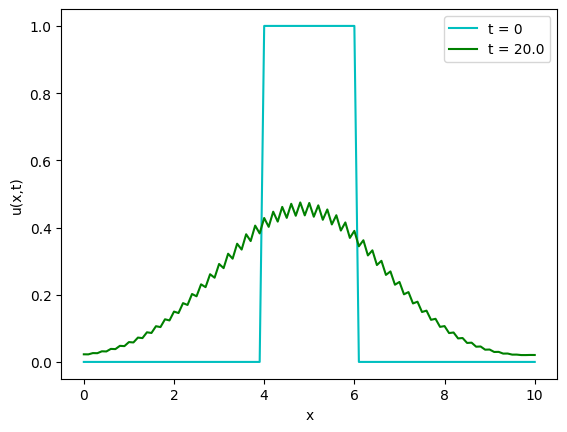

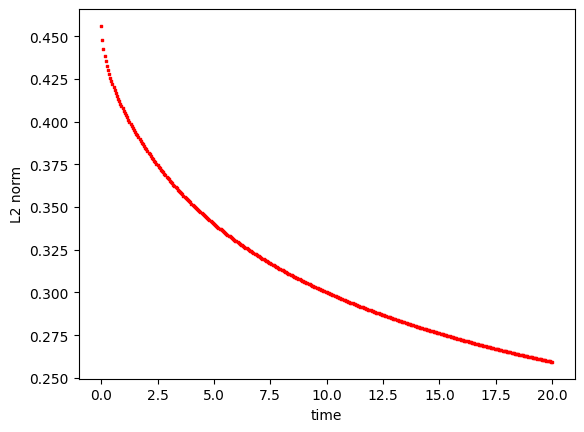

In [19]:
u_current_1 = u_initial.copy()
l2norm_1 = []
l2norm_1.append(np.sqrt(np.sum(u_current_1**2)/len(u_current_1)))

time = []
time.append(0)
t = 0

while t<t_final:
    u_next_1 = 0.5*(np.roll(u_current_1,-1) + np.roll(u_current_1,1)) - a*dt/2/dx *(np.roll(u_current_1,-1) - np.roll(u_current_1,1))    
        
    u_current_1 = u_next_1.copy()
    
    l2norm_1.append( np.sqrt(np.sum(u_current_1**2)/len(u_current_1)) )
    
    t = t+dt
    time.append(t)
        

plt.plot(x,u_initial,color='c',label='t = 0')
plt.plot(x,u_current_1,color='g',label='t = '+str(t_final))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
#plt.savefig('./imm_sf/final_LF.png',dpi=150)
plt.show()

plt.scatter(time,l2norm_1,marker='s',s=2,c='r')
plt.xlabel('time')
plt.ylabel('L2 norm')
plt.show()

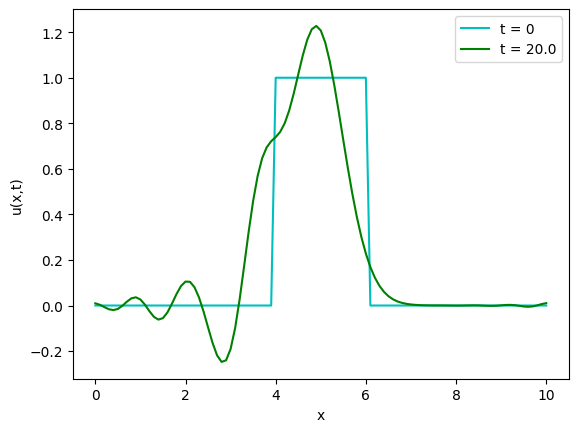

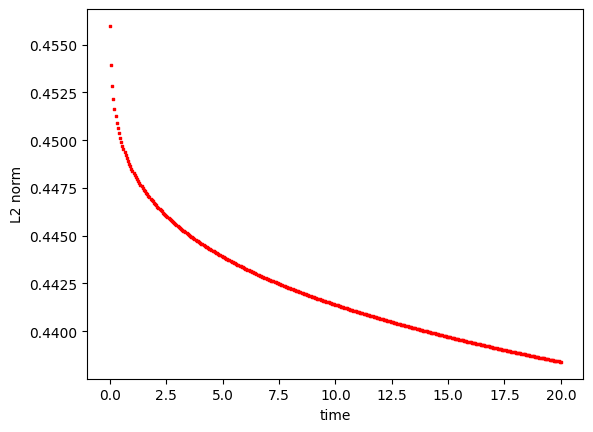

In [20]:
u_current_2 = u_initial.copy()
l2norm_2 = []
l2norm_2.append(np.sqrt(np.sum(u_current_2**2)/len(u_current_2)))

time = []
time.append(0)
t = 0

while t<t_final:
    u_next_2 = u_current_2 - 0.5*(a*dt/dx) *(np.roll(u_current_2, -1) - np.roll(u_current_2, 1)) + 0.5*((a*dt/dx)**2) * (np.roll(u_current_2,1) + np.roll(u_current_2,-1) - 2*u_current_2)
        
    u_current_2 = u_next_2.copy()
    
    l2norm_2.append( np.sqrt(np.sum(u_current_2**2)/len(u_current_2)) )

    t = t+dt
    time.append(t)
    
plt.plot(x,u_initial,color='c',label='t = 0')
plt.plot(x,u_current_2,color='g',label='t = '+str(t_final))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
#plt.savefig('./imm_sf/final_LW.png',dpi=150)
plt.show()

plt.scatter(time,l2norm_2,marker='s',s=2,c='r')
plt.xlabel('time')
plt.ylabel('L2 norm')
plt.show()

Norm compare

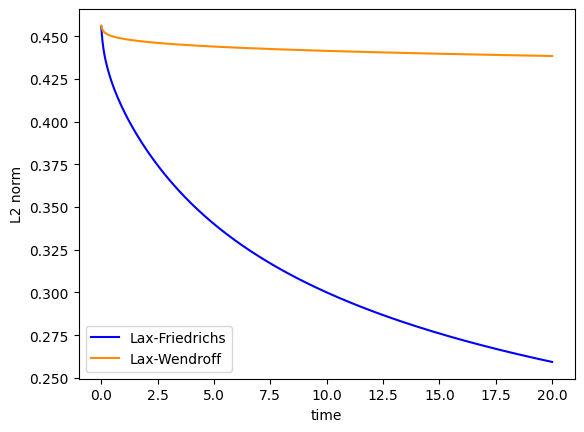

1.6903282418910965

In [21]:
plt.plot(time,l2norm_1,color='b',label='Lax-Friedrichs')
plt.plot(time,l2norm_2,color='darkorange',label='Lax-Wendroff')
plt.xlabel('time')
plt.ylabel('L2 norm')
plt.legend()
#plt.savefig('./imm_sf/norms.png',dpi=150)
plt.show()
index = int( len(time)-1 )
l2norm_2[index]/l2norm_1[index]

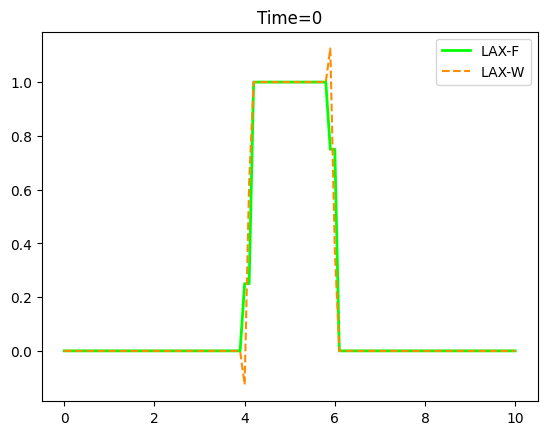

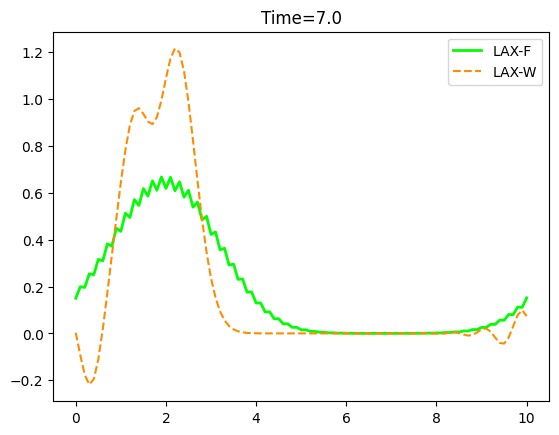

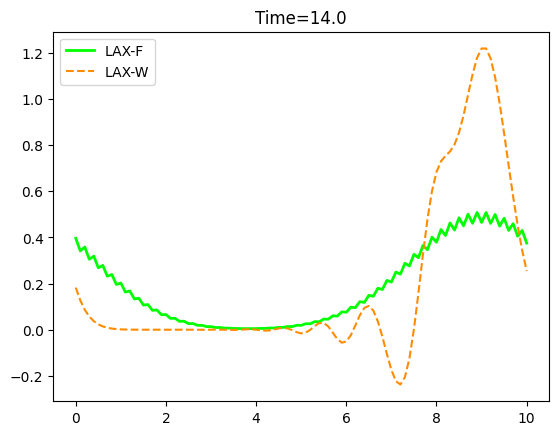

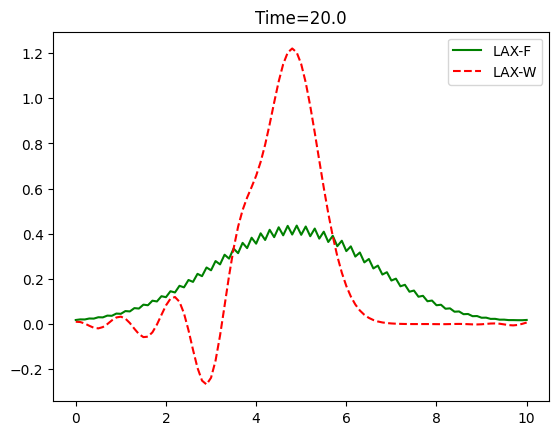

4


"\nu_current_1 = u_initial.copy()\nu_current_2 = u_initial.copy()\nt = 0\nj = 0\nk = 0\n\nwhile t<t_final:\n    if (j)%50==0 and j!=0:\n        k+=1\n        plt.plot(x,u_current_1,color='g')\n        plt.plot(x,u_current_2,color='darkviolet')\n        plt.title('Time='+str(round(t,2)))\n        #plt.savefig('time_'+str(k)+'.png',dpi=150)\n        plt.show()\n    j += 1\n    u_next_1 = 0.5*(np.roll(u_current_1,-1) + np.roll(u_current_1,1)) - a*dt/2/dx *(np.roll(u_current_1,-1) - np.roll(u_current_1,1))    \n    u_current_1 = u_next_1.copy()\n    u_next_2 = u_current_2 - 0.5*(a*dt/dx) *(np.roll(u_current_2, -1) - np.roll(u_current_2, 1)) + 0.5*((a*dt/dx)**2) * (np.roll(u_current_2,1) + np.roll(u_current_2,-1) - 2*u_current_2)\n    u_current_2 = u_next_2.copy()    \n    t = t+dt\n    if j==1:\n        k+=1\n        plt.plot(x,u_current_1,color='g')\n        plt.plot(x,u_current_2,color='darkviolet')\n        plt.title('Time='+str(round(t,2)))\n        #plt.savefig('time_'+str(k)+'.png',d

In [22]:
x = np.linspace(0,10,nx)
u_initial = np.zeros(nx)
for i in range(nx):
    if x[i]>4 and x[i]<6:          
        u_initial[i] = 1
    else:
        u_initial[i] = 0

u_current_1 = u_initial.copy()
u_current_2 = u_initial.copy()

t = 0
i = 0
k=0

while t<t_final:
    u_next_1 = 0.5*(np.roll(u_current_1,-1) + np.roll(u_current_1,1)) - a*dt/2/dx *(np.roll(u_current_1,-1) - np.roll(u_current_1,1))    
    u_current_1 = u_next_1.copy()
    u_next_2 = u_current_2 - 0.5*(a*dt/dx) *(np.roll(u_current_2, -1) - np.roll(u_current_2, 1)) + 0.5*((a*dt/dx)**2) * (np.roll(u_current_2,1) + np.roll(u_current_2,-1) - 2*u_current_2)
    u_current_2 = u_next_2.copy()   
    
   
    
    if i%140==0:
        plt.plot(x,u_current_1,color='lime',linewidth=2, label='LAX-F')
        plt.plot(x,u_current_2,color='darkorange',linestyle='--',label='LAX-W')
        plt.legend()
        plt.title('Time='+str(round(t,3)))
        plt.savefig('./imm_sf/Finals'+str(k)+'.png',dpi=150)
        plt.show()
        k+=1

    t = t+dt
    i += 1

k+=1
plt.plot(x,u_current_1,color='g',label='LAX-F')
plt.plot(x,u_current_2,color='r',linestyle='--',label='LAX-W')
plt.legend()
plt.title('Time='+str(round(t,3)))
plt.savefig('./imm_sf/Finals'+str(k)+'.png',dpi=150)
plt.show()   
print(k)
'''
u_current_1 = u_initial.copy()
u_current_2 = u_initial.copy()
t = 0
j = 0
k = 0

while t<t_final:
    if (j)%50==0 and j!=0:
        k+=1
        plt.plot(x,u_current_1,color='g')
        plt.plot(x,u_current_2,color='darkviolet')
        plt.title('Time='+str(round(t,2)))
        #plt.savefig('time_'+str(k)+'.png',dpi=150)
        plt.show()
    j += 1
    u_next_1 = 0.5*(np.roll(u_current_1,-1) + np.roll(u_current_1,1)) - a*dt/2/dx *(np.roll(u_current_1,-1) - np.roll(u_current_1,1))    
    u_current_1 = u_next_1.copy()
    u_next_2 = u_current_2 - 0.5*(a*dt/dx) *(np.roll(u_current_2, -1) - np.roll(u_current_2, 1)) + 0.5*((a*dt/dx)**2) * (np.roll(u_current_2,1) + np.roll(u_current_2,-1) - 2*u_current_2)
    u_current_2 = u_next_2.copy()    
    t = t+dt
    if j==1:
        k+=1
        plt.plot(x,u_current_1,color='g')
        plt.plot(x,u_current_2,color='darkviolet')
        plt.title('Time='+str(round(t,2)))
        #plt.savefig('time_'+str(k)+'.png',dpi=150)
        plt.show()
    
    
k+=1
plt.plot(x,u_current_1,color='g')
plt.plot(x,u_current_2,color='darkviolet')
plt.title('Time='+str(round(t,2)))
#plt.savefig('time_'+str(k)+'.png',dpi=150)
plt.show()  
'''

Changing J for LF

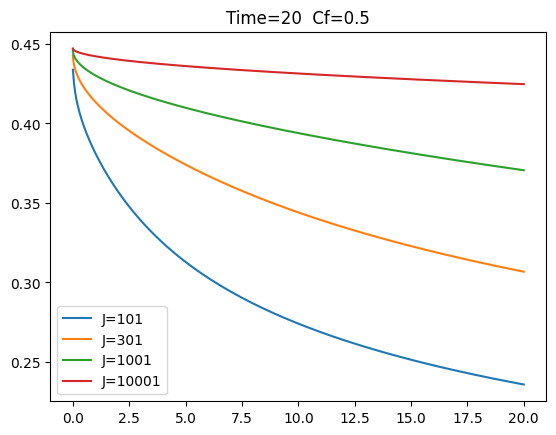

In [24]:
cf = 0.5
J = [101,301,1001,10001]


for N in J:
    
    x = np.linspace(0,10,N)
    u_initial = np.zeros(N)
    for i in range(N):
        if x[i]>4 and x[i]<6:          
            u_initial[i] = 1
        else:
            u_initial[i] = 0
        
   # u_initial = step_function(x)
    u_current_1 = u_initial.copy()
    t = 0
    time = []
    time.append(t)
    l2norm_1 = []
    l2norm_1.append(np.sqrt(np.sum(u_current_1**2)/len(u_current_1)))

    dx = 10/(N-1)
    dt = cf*dx/a
    while t<t_final:
        u_next_1 = 0.5*(np.roll(u_current_1,-1) + np.roll(u_current_1,1)) - a*dt/2/dx *(np.roll(u_current_1,-1) - np.roll(u_current_1,1))    
        
        u_current_1 = u_next_1.copy()
    
        l2norm_1.append( np.sqrt(np.sum(u_current_1**2)/len(u_current_1)) )
   
        t = t+dt
        time.append(t)
        
    #plt.plot(x,u_current_1,label='J='+str(N))
    plt.plot(time,l2norm_1,label='J='+str(N))
    
#plt.plot(x,u_initial,label='initial')
plt.title('Time=20  Cf=0.5')
plt.legend()
#plt.savefig('./imm_sf/Jvar_LF.png',dpi=150)
plt.savefig('./imm_sf/Jnorm_LF.png',dpi=150)
plt.show()

Changing J for LW

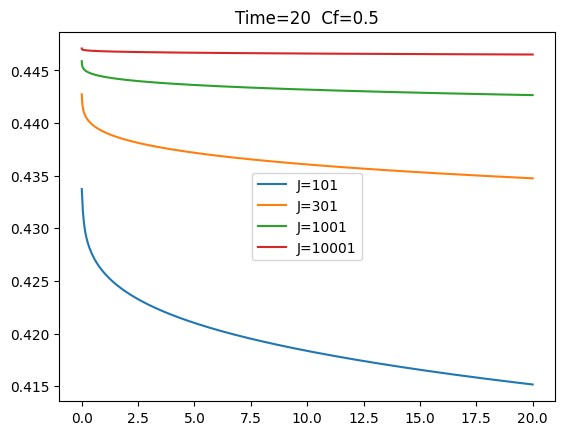

In [26]:
cf = 0.5
J = [101, 301, 1001, 10001]

for N in J:
    x = np.linspace(0,10,N)
    u_initial = np.zeros(N)
    for i in range(N):
        if x[i]>4 and x[i]<6:          
            u_initial[i] = 1
        else:
            u_initial[i] = 0
    u_current_2 = u_initial.copy()
    l2norm_2 = []
    l2norm_2.append(np.sqrt(np.sum(u_current_2**2)/len(u_current_2)))
    time = []
    time.append(0)
    t = 0

    dx = 10/(N-1)
    dt = cf*dx/a
    while t<t_final:
        u_next_2 = u_current_2 - 0.5*(a*dt/dx) *(np.roll(u_current_2, -1) - np.roll(u_current_2, 1)) + 0.5*((a*dt/dx)**2) * (np.roll(u_current_2,1) + np.roll(u_current_2,-1) - 2*u_current_2)
        
        u_current_2 = u_next_2.copy()
    
        l2norm_2.append( np.sqrt(np.sum(u_current_2**2)/len(u_current_2)) )

    
        t = t+dt
        time.append(t)
    
    #plt.plot(x,u_current_2,label='J='+str(N))
    plt.plot(time,l2norm_2,label='J='+str(N))
    
plt.title('Time=20  Cf=0.5')
plt.legend()
#plt.savefig('./imm_sf/Jvar_LW.png',dpi=150)
plt.savefig('./imm_sf/Jnorm_LW.png',dpi=150)
plt.show()

Changing cf for Lf

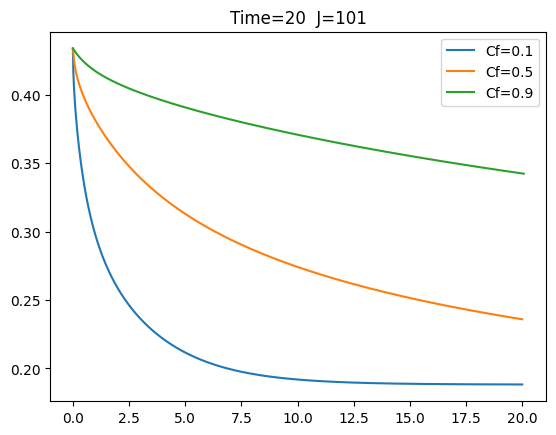

In [28]:
N = 101
CF = [0.1, 0.5, 0.9]

x = np.linspace(0,10,N)
u_initial = np.zeros(N)
for i in range(N):
    if x[i]>4 and x[i]<6:          
        u_initial[i] = 1
    else:
        u_initial[i] = 0

for cf in CF:
    x = np.linspace(0,10,N)
    u_initial = np.zeros(N)
    for i in range(N):
        if x[i]>4 and x[i]<6:          
            u_initial[i] = 1
        else:
            u_initial[i] = 0
    u_current_1 = u_initial.copy()
    t = 0
    time = []
    time.append(t)
    l2norm_1 = []
    l2norm_1.append(np.sqrt(np.sum(u_current_1**2)/len(u_current_1)))

    dx = 10/(N-1)
    dt = cf*dx/a
    while t<t_final:
        u_next_1 = 0.5*(np.roll(u_current_1,-1) + np.roll(u_current_1,1)) - a*dt/2/dx *(np.roll(u_current_1,-1) - np.roll(u_current_1,1))    
        
        u_current_1 = u_next_1.copy()
    
        l2norm_1.append( np.sqrt(np.sum(u_current_1**2)/len(u_current_1)) )
    
        t = t+dt
        time.append(t)
    
    #plt.plot(x,u_current_1,label='Cf='+str(cf))
    plt.plot(time,l2norm_1,label='Cf='+str(cf))

plt.legend()
plt.title('Time=20  J=101')
#plt.savefig('./imm_sf/Cfvar_LF.png',dpi=150)
plt.savefig('./imm_sf/Cfnorm_LF.png',dpi=150)
plt.show()

Changing cf for Lw

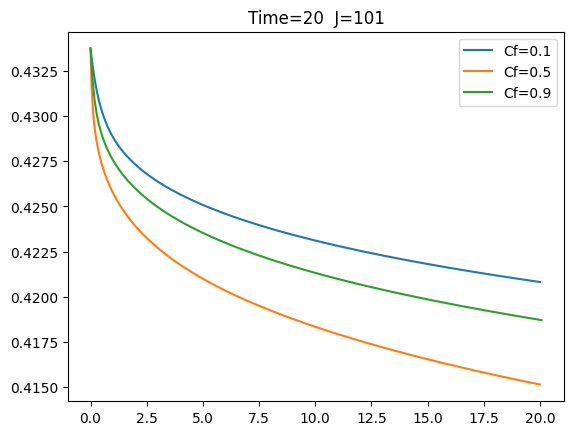

In [30]:
nx = 101
CF = [0.1, 0.5, 0.9]

x = np.linspace(0,10,nx)
u_initial = np.zeros(nx)
for i in range(nx):
    if x[i]>4 and x[i]<6:          
        u_initial[i] = 1
    else:
        u_initial[i] = 0

for cf in CF:
    u_current_2 = u_initial.copy()
    l2norm_2 = []
    l2norm_2.append(np.sqrt(np.sum(u_current_2**2)/len(u_current_2)))
    time = []
    time.append(0)
    t = 0

    dx = 10/(nx-1)
    dt = cf*dx/a
    while t<t_final:
        u_next_2 = u_current_2 - 0.5*(a*dt/dx) *(np.roll(u_current_2, -1) - np.roll(u_current_2, 1)) + 0.5*((a*dt/dx)**2) * (np.roll(u_current_2,1) + np.roll(u_current_2,-1) - 2*u_current_2)
        
        u_current_2 = u_next_2.copy()
    
        l2norm_2.append( np.sqrt(np.sum(u_current_2**2)/len(u_current_2)) )

    
        t = t+dt
        time.append(t)
    
    #plt.plot(x,u_current_2,label='Cf='+str(cf))
    plt.plot(time,l2norm_2,label='Cf='+str(cf))
    
plt.legend()
plt.title('Time=20  J=101')
#plt.savefig('./imm_sf/Cfvar_LW.png',dpi=150)
plt.savefig('./imm_sf/Cfnorm_LW.png',dpi=150)
plt.show()

Changing both for LF

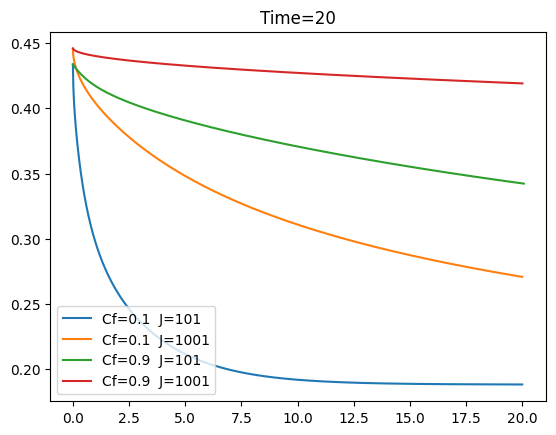

In [15]:
J = [101, 1001]
CF = [0.1, 0.9]

for cf in CF:
    for nx in J:
        x = np.linspace(0,10,nx)
        u_initial = np.zeros(nx)
        for i in range(nx):
            if x[i]>4 and x[i]<6:          
                u_initial[i] = 1
            else:
                u_initial[i] = 0
                
        u_current_1 = u_initial.copy()
        t = 0
        time = []
        time.append(t)
        l2norm_1 = []
        l2norm_1.append(np.sqrt(np.sum(u_current_1**2)/len(u_current_1)))

        dx = 10/(nx-1)
        dt = cf*dx/a
        while t<t_final:
            u_next_1 = 0.5*(np.roll(u_current_1,-1) + np.roll(u_current_1,1)) - a*dt/2/dx *(np.roll(u_current_1,-1) - np.roll(u_current_1,1))    
            u_current_1 = u_next_1.copy()  
            l2norm_1.append( np.sqrt(np.sum(u_current_1**2)/len(u_current_1)) )

            t = t+dt
            time.append(t)

        #plt.plot(x,u_current_1,label='Cf='+str(cf)+'  J='+str(nx))
        plt.plot(time,l2norm_1,label='Cf='+str(cf)+'  J='+str(nx))
        
plt.legend()
plt.title('Time=20')
#plt.savefig('./imm_sf/Jcfvar_LF.png',dpi=150)
plt.savefig('./imm_sf/Jcfnorm_LF.png',dpi=150)
plt.show()

Changing both for LW

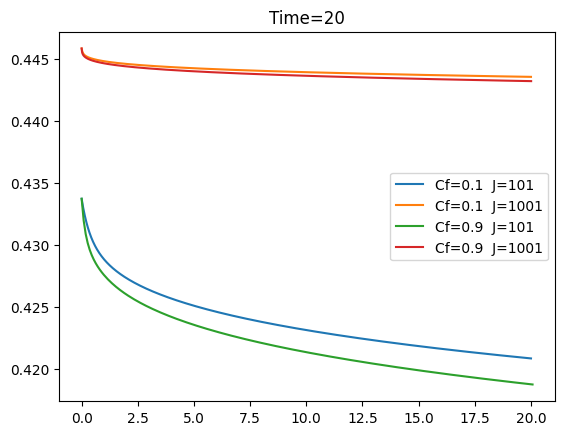

In [16]:
J = [101, 1001]
CF = [0.1, 0.9]

for cf in CF:
    for nx in J:
        x = np.linspace(0,10,nx)
        u_initial = np.zeros(nx)
        for i in range(nx):
            if x[i]>4 and x[i]<6:          
                u_initial[i] = 1
            else:
                u_initial[i] = 0
                
        u_current_2 = u_initial.copy()
        l2norm_2 = []
        l2norm_2.append(np.sqrt(np.sum(u_current_2**2)/len(u_current_2)))
        time = []
        time.append(0)
        t = 0

        dx = 10/(nx-1)
        dt = cf*dx/a
        while t<t_final:
            u_next_2 = u_current_2 - 0.5*(a*dt/dx) *(np.roll(u_current_2, -1) - np.roll(u_current_2, 1)) + 0.5*((a*dt/dx)**2) * (np.roll(u_current_2,1) + np.roll(u_current_2,-1) - 2*u_current_2)
            u_current_2 = u_next_2.copy()    
            l2norm_2.append( np.sqrt(np.sum(u_current_2**2)/len(u_current_2)) )

            t = t+dt
            time.append(t)

        #plt.plot(x,u_current_2,label='Cf='+str(cf)+'  J='+str(nx))
        plt.plot(time,l2norm_2,label='Cf='+str(cf)+'  J='+str(nx))
        
plt.legend()
plt.title('Time=20')
#plt.savefig('./imm_sf/Jcfvar_LW.png',dpi=150)
plt.savefig('./imm_sf/Jcfnorm_LW.png',dpi=150)
plt.show()